# 関数 save_fig：図の保存

In [1]:
# 2バイト文字をグラフで扱うためのパッケージインストール
!pip install japanize-matplotlib

import os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

def save_fig(plt, file_prefix, bbox_inches='tight'):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches=bbox_inches, pad_inches = 0.2)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches=bbox_inches, pad_inches = 0.2)

import sys
from datetime import datetime
import uuid

def dmcode():
    t = datetime.now().strftime('%f%S%M%H%d%m%Y')
    buff = ['***DMCODE', t, str(uuid.uuid4())]
    print(' '.join(buff))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=481c6e2b9a8edca60e2ac171f3de02c4f153baf92c7097f46aefe929354ecd35
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# 関数 plot_decision_region：決定境界と領域を描画する

In [2]:
def plot_decision_region(x, y, model, file_prefix=''):
    """決定境界と領域を描画する
    Args:
        x (ndarray): 説明変数
        y (ndarray): 目的変数
        file_prefix (str): 保存ファイル名のプレフィックス
    """
    plt.figure(figsize=(6, 6))
    plt.scatter(x[y == 0, 0], x[y == 0, 1], s=200, marker='o', label='ハム')
    plt.scatter(x[y == 1, 0], x[y == 1, 1], s=200, marker='^', label='スパム')
    plt.legend(fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('単語「口座」の個数', fontsize=16)
    plt.ylabel('単語「セール」の個数', fontsize=16)
    plot_step = 0.01
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    x_min=0
    y_min=0
    x_max=12
    y_max=12
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plt.tight_layout()
    save_fig(plt, file_prefix)
    plt.show()

# 関数 scoreとevaluate：分類性能の評価

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

def calc_score(y_true, y_pred, class_labels, name, func):
    """ある指標の値をクラスごとに計算する。
    Args:
        y_true (ndarray): 目的変数（正解）
        y_pred (ndarray): 予測値
        class_labels (list): クラスラベル（文字列）を格納したリスト
        name (str): 指標の名前
        func (sklearn.metrics): 指標を計算する関数
    """
    # 指標の計算。average=None クラスごとに値を計算する
    score = func(y_true, y_pred, average=None)

    # 書式整形してクラスごとの値を表示する
    score_str = []
    for i in range(y_true.max() + 1):
        score_str.append(f'{score[i]:.2f}')

    print('\n' + name)
    print(' '.join(class_labels))
    print(' '.join(score_str))

def evaluate(y_true, y_pred, file_prefix=''): # file_prefix to be removed
    """分類性能の評価用関数。混同行列・正解率・精度・再現率・F1値を計算し、表示する。
    Args:
        y_true (ndarray): 目的変数（正解）
        y_pred (ndarray): 予測値
    """

    # 混同行列の計算
    cm = confusion_matrix(y_true, y_pred)

    # 正解率の計算
    accuracy = accuracy_score(y_true, y_pred)
    print('正解率')
    print(f'{accuracy}')

    # 精度と再現率の表示用にクラスラベルを生成
    class_labels = []
    for i in range(y_true.max() + 1):
        class_labels.append(f'{i:4d}') # 空白を含め最低4桁で表示

    # 精度の計算。average=None クラスごとに精度を計算する
    calc_score(y_true, y_pred, class_labels, '精度', precision_score)

    # 再現率の計算。average=None クラスごとに再現率を計算する
    calc_score(y_true, y_pred, class_labels, '再現率', recall_score)

    # F1値の計算。
    calc_score(y_true, y_pred, class_labels, 'F1値', f1_score)

    # 混同行列を可視化する
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm, annot=True, fmt='3d', square=True, cmap='hot', annot_kws = {'size':14})
    plt.xlabel('予測', fontsize=14)
    plt.ylabel('正解', fontsize=14)
    plt.tight_layout()
    save_fig(plt, file_prefix=file_prefix) # to be removed
    plt.show()

# 実習11.1：メールデータセットの読み込み

In [4]:
import pandas as pd

df = pd.read_csv('dm11-1.csv', encoding='utf-8')
df # データの表示

,口座,セール,スパム
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


# 実習11.2：ランダムフォレストによるメール分類

正解率
0.9444444444444444

精度
   0    1
1.00 0.90

再現率
   0    1
0.89 1.00

F1値
   0    1
0.94 0.95


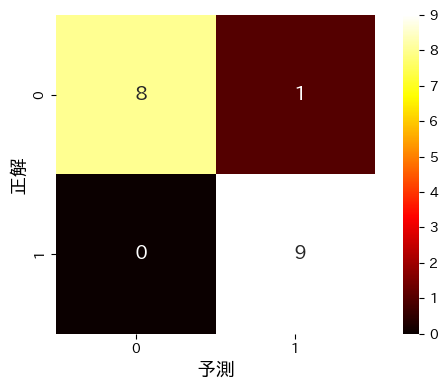

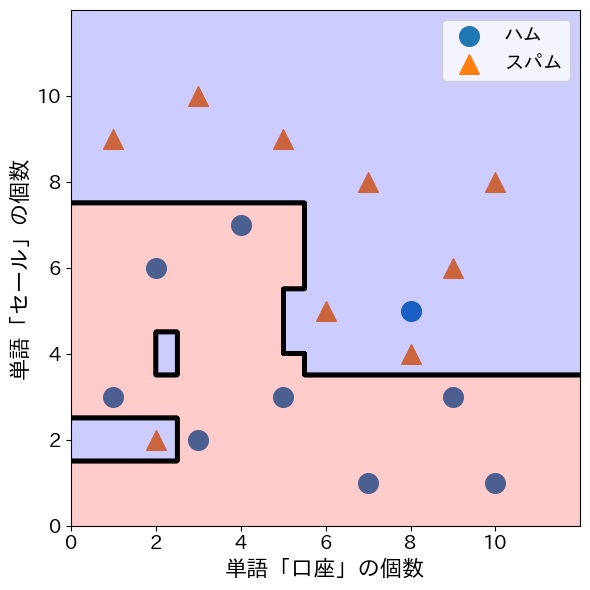

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

x = df[['口座', 'セール']].to_numpy() # 説明変数
y = df['スパム'].to_numpy()         # 目的変数


# ランダムフォレストを生成
rf = RandomForestClassifier(criterion='gini',# 分割指標にジニ不純度を指定
                            n_estimators=15, # 弱学習器の個数
                            max_depth=5,     # 最大の木の深さ
                            random_state=0)  # 乱数列を固定

# 説明変数から目的変数を予測できるように学習
rf.fit(x, y)

# 説明変数について予測
y_pred = rf.predict(x)

# 分類性能の評価
evaluate(y, y_pred)

# 決定境界の描画
plot_decision_region(x,y,rf)

# 実習11.3：AdaBoostによるメール分類

正解率
0.9444444444444444

精度
   0    1
1.00 0.90

再現率
   0    1
0.89 1.00

F1値
   0    1
0.94 0.95


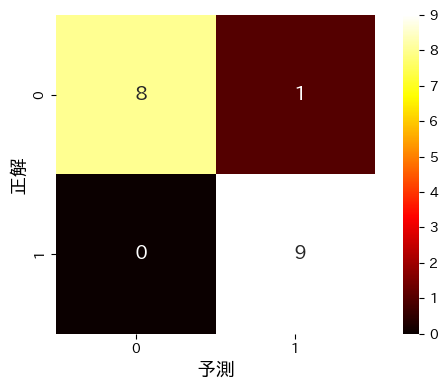

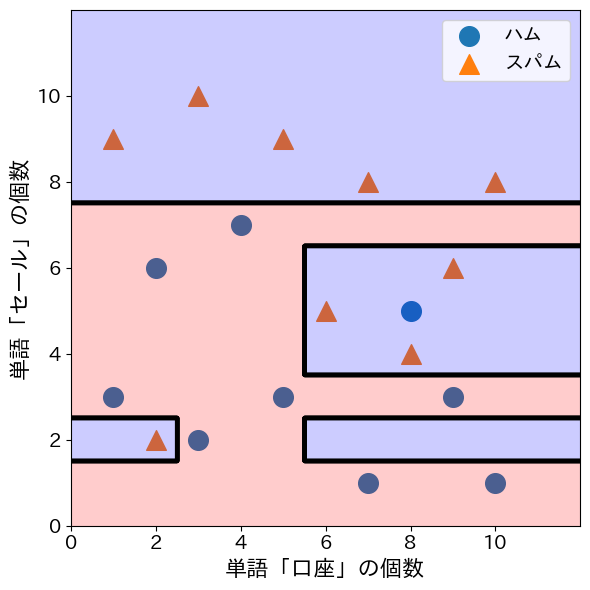

In [9]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

x = df[['口座', 'セール']].to_numpy() # 説明変数
y = df['スパム'].to_numpy()         # 目的変数


# AdaBoostを生成
abc = AdaBoostClassifier(n_estimators=15, # 弱学習器の個数
                         random_state=0)  # 乱数列を固定

# 説明変数から目的変数を予測できるように学習
abc.fit(x, y)

# 説明変数について予測
y_pred = abc.predict(x)

# 分類性能の評価
evaluate(y, y_pred)

# 決定境界の描画
plot_decision_region(x,y,abc)

# 実習11.4：水の飲用可能性予測 ランダムフォレスト・ハイパーパラメータのグリッドサーチによるチューニング

***DMCODE 79361311430406122023 38ccde39-83b2-4551-a849-579e21d4c119
説明変数の個数: 9
最良ハイパーパラメータ: {'max_depth': 32, 'n_estimators': 128}
最良スコア: 0.6502250901633616
テストデータでの汎化能力
正解率
0.7086092715231788

精度
   0    1
0.71 0.72

再現率
   0    1
0.89 0.43

F1値
   0    1
0.79 0.53


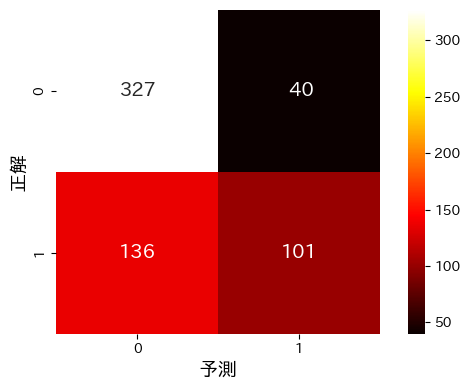

In [14]:
dmcode()

# これ以降にコードを記述すること。
import sklearn
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier

df2 = pd.read_csv('dm11-2.csv', encoding='utf-8')

# データフレームの列は説明変数と目的変数を含んでいる。
# 説明変数の列名として、目的変数以外の列名を取得する。
feature_names = list(df2.columns)
feature_names.remove('飲用可能性')
print('説明変数の個数:', len(feature_names))
x = df2[feature_names].to_numpy() # 説明変数
y = df2['飲用可能性'].to_numpy()      # 目的変数

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,
                                                    shuffle=True, random_state=0)

params = {
        'n_estimators': [2, 4, 8, 16, 32, 64, 128], # 弱学習器の個数
        'max_depth': [1, 2, 4, 8, 16, 32, 64], # 決定木の深さ
}

# ランダムフォレストを生成
rf = RandomForestClassifier(criterion='gini',# 分割指標にジニ不純度を指定
                            random_state=0) # 乱数列を固定


# 分割数(n_splits)=10のK分割交差検証
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# 最良ハイパーパラメータを決める際の指標
# average='weighted': 全クラスで平均する際に各クラスのデータ数で重み付け
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score,
                                     average='weighted')

# 分類器の最良ハイパーパラメータをグリッドサーチで求める
grid_cv = GridSearchCV(estimator=rf, # 分類器
                       param_grid=params, # 試行するハイパーパラメータの候補
                       scoring=scorer, # 最良ハイパーパラメータを決める際の指標
                       cv=k_fold) # 交差検証方法

# 訓練データを使い、最良ハイパーパラメータを決定
grid_cv.fit(x_train, y_train)

# 最良ハイパーパラメータとスコアを変数grid_cvの属性から取得
print('最良ハイパーパラメータ:', grid_cv.best_params_)
print('最良スコア:', grid_cv.best_score_)

print('テストデータでの汎化能力')
y_test_pred = grid_cv.predict(x_test) # テストデータに対する予測
evaluate(y_test, y_test_pred)

# 実習11.5：水の飲用可能性予測 AdaBoostハイパーパラメータのグリッドサーチによるチューニング

***DMCODE 36185156440406122023 63e4da9d-c07f-4737-932d-8ecc1740239f
説明変数の個数: 9
最良ハイパーパラメータ: {'n_estimators': 16}
最良スコア: 0.5568288829434458
テストデータでの汎化能力
正解率
0.6175496688741722

精度
   0    1
0.63 0.53

再現率
   0    1
0.89 0.20

F1値
   0    1
0.74 0.29


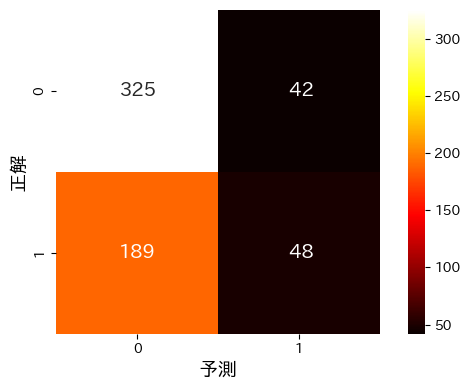

In [15]:
dmcode()

# これ以降にコードを記述すること。
import sklearn
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import AdaBoostClassifier

df2 = pd.read_csv('dm11-2.csv', encoding='utf-8')

# データフレームの列は説明変数と目的変数を含んでいる。
# 説明変数の列名として、目的変数以外の列名を取得する。
feature_names = list(df2.columns)
feature_names.remove('飲用可能性')
print('説明変数の個数:', len(feature_names))
x = df2[feature_names].to_numpy() # 説明変数
y = df2['飲用可能性'].to_numpy()      # 目的変数

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,
                                                    shuffle=True, random_state=0)

params = {
        'n_estimators': [2, 4, 8, 16, 32, 64, 128], # 決定木の深さ
}

# AdaBoostを生成
abc = AdaBoostClassifier(random_state=0) # 乱数列を固定


# 分割数(n_splits)=10のK分割交差検証
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# 最良ハイパーパラメータを決める際の指標
# average='weighted': 全クラスで平均する際に各クラスのデータ数で重み付け
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score,
                                     average='weighted')

# 分類器の最良ハイパーパラメータをグリッドサーチで求める
grid_cv = GridSearchCV(estimator=abc, # 分類器
                       param_grid=params, # 試行するハイパーパラメータの候補
                       scoring=scorer, # 最良ハイパーパラメータを決める際の指標
                       cv=k_fold) # 交差検証方法

# 訓練データを使い、最良ハイパーパラメータを決定
grid_cv.fit(x_train, y_train)

# 最良ハイパーパラメータとスコアを変数grid_cvの属性から取得
print('最良ハイパーパラメータ:', grid_cv.best_params_)
print('最良スコア:', grid_cv.best_score_)

print('テストデータでの汎化能力')
y_test_pred = grid_cv.predict(x_test) # テストデータに対する予測
evaluate(y_test, y_test_pred)